# Capstone Regression Project

### Author:  Krist Zografi

## Business Understanding

KVZ Realtors want to provide guidance to home sellers on how to increase the value of their house prior to listing it, including increasing value based on improvements to particular features.
My recommendations will help KVZ Realtors in helping home sellers in their decisions to attempt an increase in their home sale price. In other words, it will show them  which features of the house have been more in demand and increase the house price.

## Data Understanding

This project will be using the King County House Sales dataset providing sales between 2021-2022, home sales in King County, Washington. The dataset includes 30'155 values. Each dataset has:
- Price of the house and date it was sold
- Square footage of living space
- Square footage of the lot
- Number of bedrooms, bathrooms and floors
- If the house is near waterfront
- The quality of the view from the house
- The house's grade 
etc...

## Data Preparation
### Loading the Data

In [1]:
#importing main libraries I will be using into this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import norm
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#We will be starting by loading the data to understand them futher.
import markdown

with open('data/column_names.md', 'r') as f:
    text = f.read()
    print(text)

# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house 

In [3]:
kcdf = pd.read_csv('data/kc_house_data.csv')
kcdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


As we can see from the dataframe we have so many important columns that will help us with the statistical analysis. 

### Data Exploration

In [4]:
#Information of how many rows and columns this dataset is made of
kcdf.shape

(30155, 25)

In [5]:
#Will displaying  column names, non-null values and their type
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

As we can see above there aren't much information missing.

In [6]:
#Will show us different statistical infromation abut our dataframe like the rows count, 
#their mean, standart deviation and other statistical information that we'll use to help us in our reseach
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


We will be starting by making some simple data cleaning which involves the elimination of the null data we saw earlier.

In [7]:
#Shows the number of row that are null or empty
kcdf.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

From the info above we can notice that we have some rows missing in the 'heat_source' and sewer_system, but not to worry we will take care of them.

In [8]:
#droping missing values
kcdf.dropna(subset=['heat_source','sewer_system'], axis = 0, inplace=True)

#checkin again if the null values have been droped
kcdf.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [9]:
kcdf.shape

(30111, 25)

As we can see now we have 30111 value from what we had at the beginning. 

#### Finding duplicates

In [10]:
kcdf[kcdf.duplicated(subset=['id'], keep=False)].sort_values('id')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [11]:
#Drop the first duplicate
kcdf.drop_duplicates(['id'], keep='last', inplace=True)

#### Adding Seasons

We will start by renaming and converting the 'date' column into a datetime type format. 

In [12]:
#Changing from 'date' to 'datesold' which indicates the date the house was sold
rnmdate = {'date':'date_sold'}
kcdf.rename(columns=rnmdate,inplace=True)

# converting our date to a proper datetime
kcdf['date_sold'] = pd.to_datetime(kcdf['date_sold']) 

We will use this column to create a column month_sold and then to create a column seasons_sold, which will be used to determinate in which season the houses were sold the more. 

In [13]:
#creating month sold so we can use it to create seasons
kcdf['month_sold'] = pd.to_datetime(kcdf['date_sold']).dt.month

In [14]:
kcdf['season_sold'] = kcdf.month_sold.replace({12:'Winter', 1:'Winter', 2 :'Winter',
                                                               3:'Spring', 4:'Spring', 5 :'Spring',
                                                               6:'Summer', 7:'Summer', 8 :'Summer',
                                                               9:'Autumn', 10:'Autumn', 11:'Autumn'})   

We won't be using month sold we can drop it now.

In [15]:
kcdf.drop('month_sold', axis=1, inplace=True)
kcdf.head()

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,season_sold
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Spring
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,Winter
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,Autumn
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,Winter
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,Summer


In [16]:
kcdf.shape

(30110, 26)

## Dropping outliners
### Baseline model
Before continuing any further to analyse the data, modify any of the columns ect, I want to take a peak at the model, so we are going to create the baseline model. 

In [17]:
#We are going to keep only sqft_living as a predictor.
y = kcdf['price']
X = kcdf['sqft_living']

# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()
# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:10   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.554e+04   9798.938     -7.709      

**Interpretation model 1:** Overall the model and coefficients are statistically significant, with all p-values well below a standard alpha of 0.05. The R-squared value is 0.370, 37% of the variance in the price can be explained by square foot living, which is quite low. We need to improve the model.

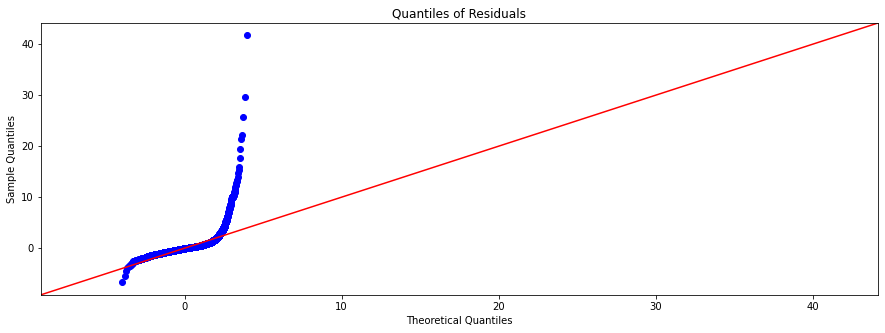

In [18]:
# Displaying a qq plot
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals")
plt.show()

In [19]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,4.539281e+09,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,2.882221e+09,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.071850e+09,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326077
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [20]:
#The first list remove outliners from all columns i thought had outliners, problem was that we end up with half the data, so 15k.
#listoutliners =['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_garage', 'sqft_patio']

#determinating list of columns I want to remove outliners
listoutliners =['price', 'sqft_living']

This function will help us with finding the lower and upper range for each outliner we determinate.

In [21]:
def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.5"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5 * iqr)
    upper_range = Q3 + (1.5 * iqr)
    return lower_range, upper_range

The for loop will itarate over the list of columns i choose and will excecute the iqr function we created and after determinating the range will drop values below the lower range  and above th eupper range.

In [22]:
for i in listoutliners:
    #determinating IQR ranges for
    i_lower, i_upper = iqr_outliers(kcdf[i])

    # dropping the elements outside lower and upper range for price
    kcdf.drop(kcdf[ (kcdf[i] > i_upper) | (kcdf[i] < i_lower) ].index , inplace=True);

In [23]:
kcdf.shape

(27691, 26)

In [24]:
kcdf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.769100e+04,2.769100e+04,27691.000000,27691.000000,27691.000000,2.769100e+04,27691.000000,27691.000000,27691.000000,27691.000000,27691.000000,27691.000000,27691.000000,27691.000000,27691.000000
mean,4.581512e+09,9.313289e+05,3.339966,2.222419,1949.394785,1.484880e+04,1.517948,1678.106497,442.743816,309.455383,197.571955,1974.157307,82.750713,47.311774,-121.286681
std,2.880785e+09,4.255972e+05,0.936086,0.766562,736.561227,5.204885e+04,0.567749,700.524199,530.829312,266.581914,219.514675,31.893474,398.107858,1.465593,5.832976
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.128750e+09,6.290000e+05,3.000000,2.000000,1380.000000,4.680000e+03,1.000000,1153.500000,0.000000,0.000000,34.000000,1952.000000,0.000000,47.389885,-122.329923
50%,3.888320e+09,8.250000e+05,3.000000,2.500000,1840.000000,7.274000e+03,1.500000,1498.000000,0.000000,370.000000,140.000000,1976.000000,0.000000,47.541935,-122.237160
75%,7.304301e+09,1.171500e+06,4.000000,2.500000,2430.000000,1.005000e+04,2.000000,2090.000000,900.000000,490.000000,290.000000,2002.000000,0.000000,47.670705,-122.117748
max,9.904000e+09,2.275000e+06,11.000000,7.500000,4060.000000,3.067495e+06,4.000000,5500.000000,3560.000000,2840.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


#### Adding Zipcode

By what we notice in the dataframe we have a column named 'address', unfortunatelly this column can't be used for statistical purposes but we are going to create a new column named zipcode out of it. The zipcode will be a better helper in our reseach.

In [25]:
#Display first 5 rows of the address
kcdf.address[0:5]

0    2102 Southeast 21st Court, Renton, Washington ...
1    11231 Greenwood Avenue North, Seattle, Washing...
2    8504 South 113th Street, Seattle, Washington 9...
3    4079 Letitia Avenue South, Seattle, Washington...
4    2193 Northwest Talus Drive, Issaquah, Washingt...
Name: address, dtype: object

In [26]:
#Diplay a full address
kcdf.address[1]

'11231 Greenwood Avenue North, Seattle, Washington 98133, United States'

As we can see the information in this row are importand and kind of confidential, so we will take only the zipcode of the city out of it and create the new column names 'zipcode'.

In [27]:
#first split get the 'Washington 98133' and from this we gone use the second split to get the zipcode
kcdf.address.iloc[0].split(', ')[2].split()[1]

'98055'

In [28]:
#Code will create a new column named zipcode and give each row the zipcode valu which we will retrieve from the address 
kcdf['zipcode'] = kcdf['address'].apply(lambda x: x.split(', ')[2].split()[-1])
kcdf['zipcode']

0        98055
1        98133
2        98178
3        98118
4        98027
         ...  
30150    98103
30151    98116
30152    98122
30153    98055
30154    98148
Name: zipcode, Length: 27691, dtype: object

Now that we have the zipcodes, its time to clean it because we have had information that address, long, lat have outliners so we have to identifie them so we can use them. To fix this we are going to do some webscraping 

We are going to get all the zipcodes that are involves King County, washington from the website: https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm

In [29]:
#First we start by importing the libraries
from bs4 import BeautifulSoup
import requests

#requesting access
resp = requests.get('https://washington.hometownlocator.com/zip-codes/countyzips,scfips,53033,c,king.cfm')
resp.status_code

200

In [30]:
#showing the HTML design
soup = BeautifulSoup(resp.content)
soup

<!DOCTYPE html>
<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<script data-cfasync="false" data-ezscrex="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=function(){var e=0,i=0,t=[],n=!1,s=[],r=[],o=!0,a=function(e,i,n,s,r,o,a){var l=this;this.name=e,this.funcName=i,this.parameters=null===n?null:n instanceof Array?n:[n],this.isBlock=s,this.blockedBy=r,this.deleteWhenComplete=o,this.isError=!1,this.isComplete=!1,this.isInitialized=!1,this.proceedIfError=a,this.isTimeDelay=!1,this.process=function(){u("... func = "+e),l.isInitialized=!0,l.isComplete=!0,u("... func.apply: "+e);var i=l.funcName.split("."),n=null;i.length>3||(n=3===i.length?window[i[0]][i[1]][i[2]]:2===i.length?window[i[0]][i[1]]:window[l.funcName]),null!=n&&n.apply(null,this.parameters),!0===l.deleteWhenComplete&&delete t[e],!0===l.isBlock&&(u("----- F'D: "+l.name),

We are going to get only the neccesary elements so they will help in retrieving the zipcode and place them later in a list.

In [31]:
a_tags = soup.find('div', class_='bodycontainer').find_all('a')
a_tags

[<a href="/wa/king/">Data</a>,
 <a href="/counties/cities,cfips,033,c,king.cfm">Cities</a>,
 <a href="/maps/countymap,cfips,033,c,king.cfm">Map</a>,
 <a href="/zip-codes/countyzips,scfips,53033,c,king.cfm">ZIP Codes</a>,
 <a href="/features/countyfeatures,scfips,53033,c,king.cfm">Features</a>,
 <a href="/schools/sorted-by-county,n,king.cfm">Schools</a>,
 <a href="/land/county-land-and-farms,scfips,53033,c,king.cfm">Land</a>,
 <a href="data,zipcode,98001.cfm">98001</a>,
 <a href="data,zipcode,98002.cfm">98002</a>,
 <a href="data,zipcode,98003.cfm">98003</a>,
 <a href="data,zipcode,98004.cfm">98004</a>,
 <a href="data,zipcode,98005.cfm">98005</a>,
 <a href="data,zipcode,98006.cfm">98006</a>,
 <a href="data,zipcode,98007.cfm">98007</a>,
 <a href="data,zipcode,98008.cfm">98008</a>,
 <a href="data,zipcode,98010.cfm">98010</a>,
 <a href="data,zipcode,98011.cfm">98011</a>,
 <a href="data,zipcode,98014.cfm">98014</a>,
 <a href="data,zipcode,98019.cfm">98019</a>,
 <a href="data,zipcode,98022.cf

In [32]:
zipcodes = [a.text for a in a_tags[8:131]]
print(zipcodes)

['98002', '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040', '98042', '98045', '98047', '98051', '98052', '98053', '98055', '98056', '98057', '98058', '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98121', '98122', '98125', '98126', '98131', '98133', '98134', '98136', '98144', '98146', '98148', '98154', '98155', '98158', '98161', '98164', '98166', '98168', '98174', '98177', '98178', '98188', '98198', '98199', '98251', '98354', '98422', '98009', '98013', '98015', '98025', '98035', '98041', '98050', '98062', '98063', '98064', '98068', '98071', '98073', '98083', '98089', '98093', '98111', '98113', '98114', '98124', '98127', '98138', '98139', '98141', '98145', '98160', 

As we can see above we have a list of all the zipcodes which are in King County. Now is time to use this list the select only teh rows that have the zipcode that are located in the King county and remove the others that aren't.

In [33]:
kcdf = kcdf.loc[kcdf['zipcode'].isin(zipcodes)]
kcdf

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,season_sold,zipcode
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,Spring,98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,Winter,98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,Autumn,98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,Winter,98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,Summer,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,Autumn,98103
30151,194000695,2021-06-16,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,Summer,98116
30152,7960100080,2022-05-27,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,Spring,98122
30153,2781280080,2022-02-24,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,Winter,98055


As we can see from the value above we have a decrease in rows, because some of the zipcodes weren't part of the list. So in this way we also removed even some of the outliners in our dataset.

We are not going to need the address column anymore se we can drop it now. 

In [34]:
kcdf.drop(columns = ['address', 'lat', 'long'], axis=1, inplace=True)
kcdf.head()

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,season_sold,zipcode
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,Gas,PUBLIC,1180,0,0,40,1969,0,Spring,98055
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,Oil,PUBLIC,1570,1570,0,240,1950,0,Winter,98133
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,Gas,PUBLIC,1580,1580,0,0,1956,0,Autumn,98178
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,Gas,PUBLIC,1090,1070,200,270,2010,0,Winter,98118
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,Electricity,PUBLIC,1120,550,550,30,2012,0,Summer,98027


#### Adding age

From the 'date_sold', yr_build and yr_renovated we are going to create a column ageto represent how old the house was at the time it was sold. We should take into account that a renovated house can be as good as a new one. 

In [35]:
kcdf['age'] = np.where(kcdf['yr_renovated']!= 0, kcdf.date_sold.apply(lambda x: x.year) - kcdf['yr_renovated'],
                                   kcdf.date_sold.apply(lambda x: x.year) - kcdf['yr_built'])
kcdf.age.head()                       

0    53
1    71
2    65
3    11
4     9
Name: age, dtype: int64

In [36]:
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26177 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             26177 non-null  int64         
 1   date_sold      26177 non-null  datetime64[ns]
 2   price          26177 non-null  float64       
 3   bedrooms       26177 non-null  int64         
 4   bathrooms      26177 non-null  float64       
 5   sqft_living    26177 non-null  int64         
 6   sqft_lot       26177 non-null  int64         
 7   floors         26177 non-null  float64       
 8   waterfront     26177 non-null  object        
 9   greenbelt      26177 non-null  object        
 10  nuisance       26177 non-null  object        
 11  view           26177 non-null  object        
 12  condition      26177 non-null  object        
 13  grade          26177 non-null  object        
 14  heat_source    26177 non-null  object        
 15  sewer_system   2617

After watching the info again i think is time to drop some of the columns which we wont need anymore. 
These columns are: date_sold, yr_built, yr_renovated, address, lat, long

In [37]:
kcdf.drop(columns= ['date_sold', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26177 entries, 0 to 30154
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26177 non-null  int64  
 1   price          26177 non-null  float64
 2   bedrooms       26177 non-null  int64  
 3   bathrooms      26177 non-null  float64
 4   sqft_living    26177 non-null  int64  
 5   sqft_lot       26177 non-null  int64  
 6   floors         26177 non-null  float64
 7   waterfront     26177 non-null  object 
 8   greenbelt      26177 non-null  object 
 9   nuisance       26177 non-null  object 
 10  view           26177 non-null  object 
 11  condition      26177 non-null  object 
 12  grade          26177 non-null  object 
 13  heat_source    26177 non-null  object 
 14  sewer_system   26177 non-null  object 
 15  sqft_above     26177 non-null  int64  
 16  sqft_basement  26177 non-null  int64  
 17  sqft_garage    26177 non-null  int64  
 18  sqft_p

##### Features adjustments

We are going to start with **'view'**

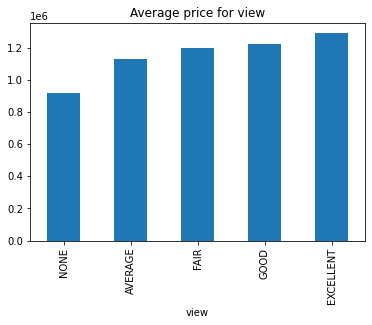

In [38]:
kcdf.groupby('view').mean()['price'].sort_values(ascending=True).plot(kind='bar')
plt.title('Average price for view');

Having an exellent view obviosly has a higher impact on the price, compared to the other categories when comparing it to a houses that doesn't have one. We're going to create a new column which has only two values, either has a view or not, and see how the price is influenced by it. We are going to combine all average, good, fair and exellent into one. 

In [39]:
kcdf['view_exist'] = kcdf.view.replace({'NONE': 'NO', 'AVERAGE': 'Yes', 'GOOD': 'Yes','FAIR': 'Yes', 'EXCELLENT': 'Yes'})

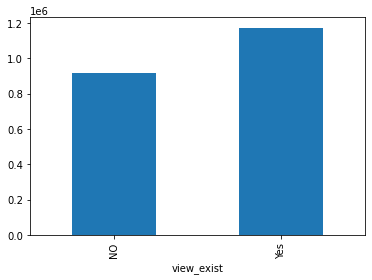

In [40]:
kcdf.groupby('view_exist').mean()['price'].sort_values(ascending=True).plot(kind='bar');

As we can see the fact of having a view in the house increases the price of the house. We are going to drop the old view and keep new one.

In [41]:
kcdf.drop('view', axis=1, inplace=True)

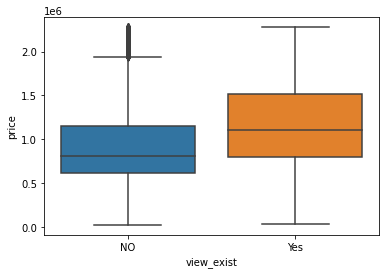

In [42]:
sns.boxplot(x="view_exist", y="price", data=kcdf);

**Bedrooms analysis**      

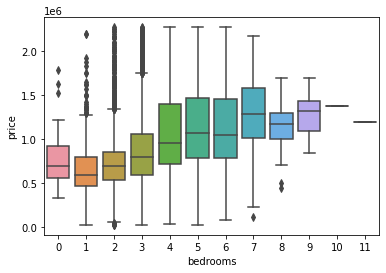

In [43]:
sns.boxplot(x="bedrooms", y="price", data=kcdf);

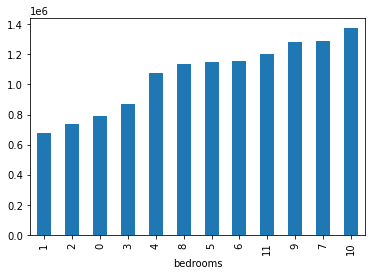

In [44]:
kcdf.groupby('bedrooms').mean()['price'].sort_values(ascending=True).plot(kind='bar');

It doesnt look like we can try to feature engineer here.

**Bathrooms analysis**   

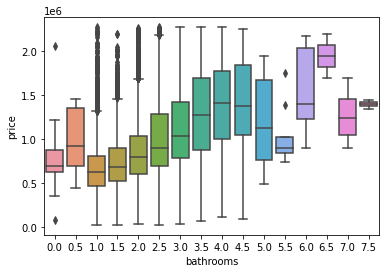

In [45]:
sns.boxplot(x="bathrooms", y="price", data=kcdf);

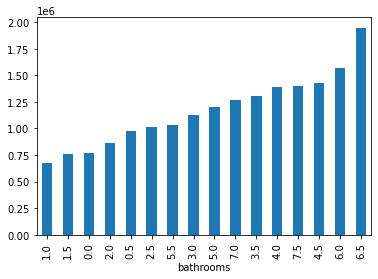

In [46]:
kcdf.groupby('bathrooms').mean()['price'].sort_values(ascending=True).plot(kind='bar');

**Greenbelt analysis**      

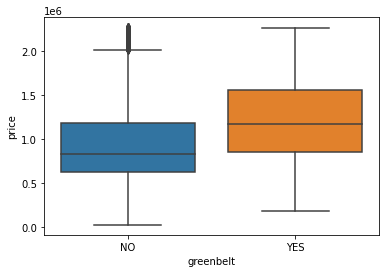

In [47]:
sns.boxplot(x="greenbelt", y="price", data=kcdf);

In [48]:
kcdf.greenbelt.value_counts()

NO     25547
YES      630
Name: greenbelt, dtype: int64

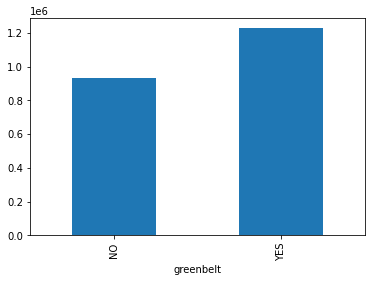

In [49]:
kcdf.groupby('greenbelt').mean()['price'].sort_values(ascending=True).plot(kind='bar');

By the plot we can see that the price doesnt have much impact by the greenbelt.

**Waterfront analysis**      

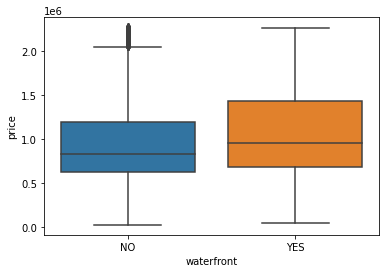

In [50]:
sns.boxplot(x="waterfront", y="price", data=kcdf);

In [51]:
kcdf.waterfront.value_counts()

NO     25883
YES      294
Name: waterfront, dtype: int64

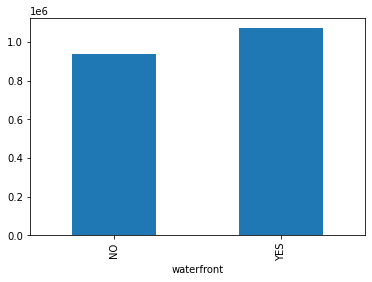

In [52]:
kcdf.groupby('waterfront').mean()['price'].sort_values(ascending=True).plot(kind='bar');

Having a water front definitly has an inpact on the price.

**Nuisance analysis**

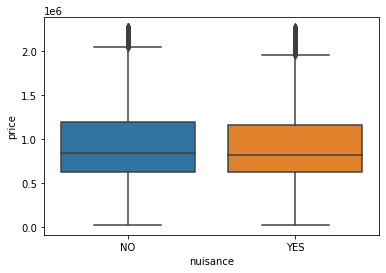

In [53]:
sns.boxplot(x="nuisance", y="price", data=kcdf);

In [54]:
kcdf.nuisance.value_counts()

NO     21641
YES     4536
Name: nuisance, dtype: int64

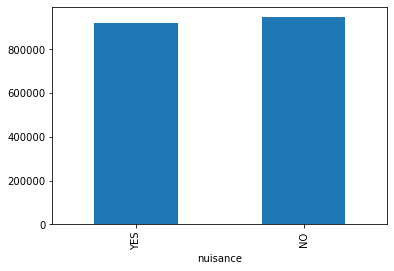

In [55]:
kcdf.groupby('nuisance').mean()['price'].sort_values(ascending=True).plot(kind='bar');

No effect at all on the we can drop this column later.

**Condition analysis** 

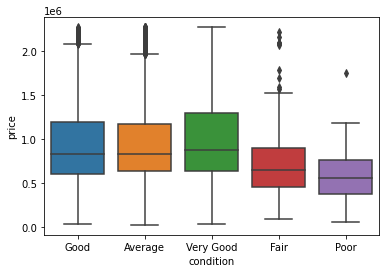

In [56]:
sns.boxplot(x="condition", y="price", data=kcdf);

In [57]:
kcdf.condition.value_counts()

Average      15552
Good          7402
Very Good     2952
Fair           212
Poor            59
Name: condition, dtype: int64

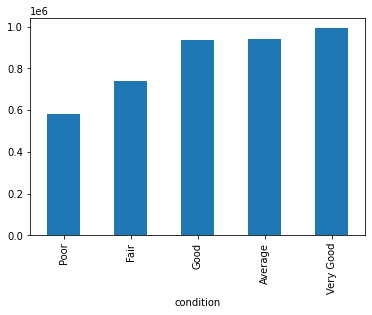

In [58]:
kcdf.groupby('condition').mean()['price'].sort_values(ascending=True).plot(kind='bar');

I was thinking of combining poor and fair together and the other together but I will leave it like this because there doesnt seem to be much of a difference between them.   

**Grade analysis**      

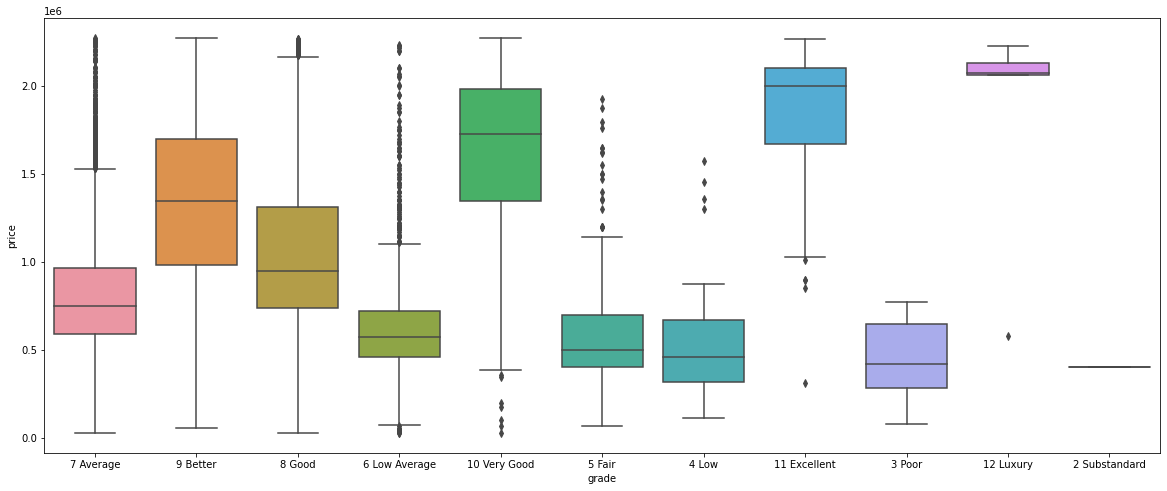

In [59]:
plt.figure(figsize=(20,8))
sns.boxplot(x="grade", y="price", data=kcdf);

In [60]:
kcdf.grade.value_counts()

7 Average        11145
8 Good            8401
9 Better          2808
6 Low Average     2749
10 Very Good       594
5 Fair             364
11 Excellent        59
4 Low               43
3 Poor               8
12 Luxury            5
2 Substandard        1
Name: grade, dtype: int64

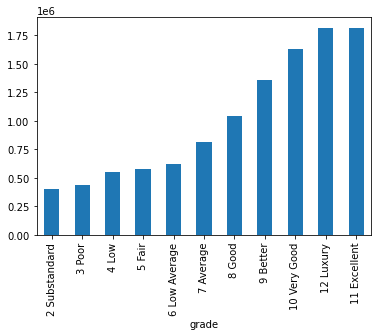

In [61]:
kcdf.groupby('grade').mean()['price'].sort_values(ascending=True).plot(kind='bar');

**Heat Source analysis**

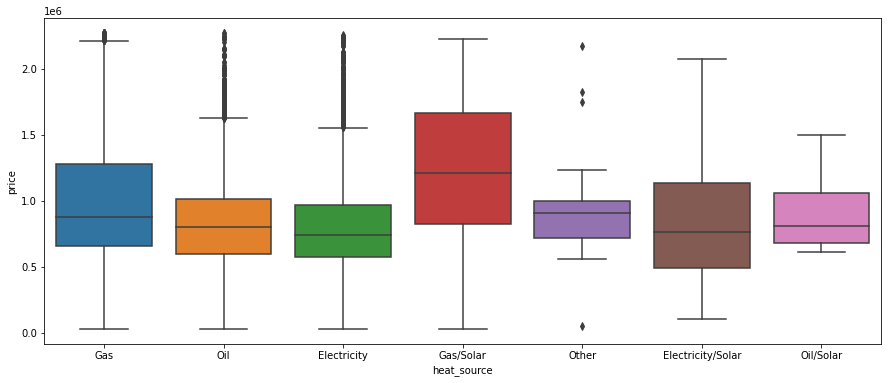

In [62]:
plt.figure(figsize=(15,6))
sns.boxplot(x="heat_source", y="price", data=kcdf);

In [63]:
kcdf.heat_source.value_counts()

Gas                  17673
Electricity           5563
Oil                   2793
Gas/Solar               74
Electricity/Solar       53
Other                   17
Oil/Solar                4
Name: heat_source, dtype: int64

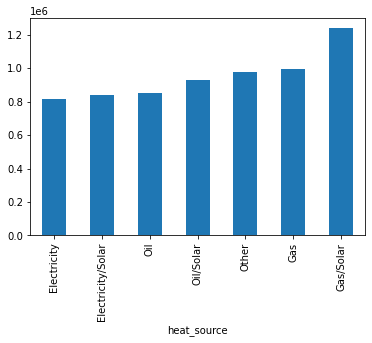

In [64]:
kcdf.groupby('heat_source').mean()['price'].sort_values(ascending=True).plot(kind='bar');

**Sewer system analysis**   

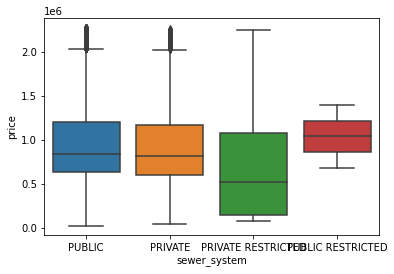

In [65]:
sns.boxplot(x="sewer_system", y="price", data=kcdf);

In [66]:
kcdf.sewer_system.value_counts()

PUBLIC                22451
PRIVATE                3719
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         2
Name: sewer_system, dtype: int64

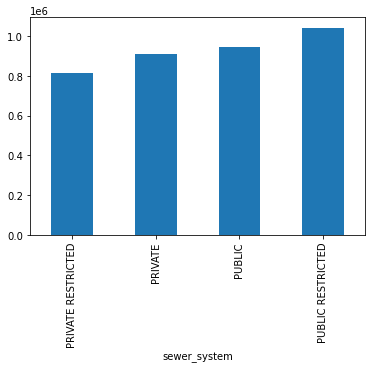

In [67]:
kcdf.groupby('sewer_system').mean()['price'].sort_values(ascending=True).plot(kind='bar');

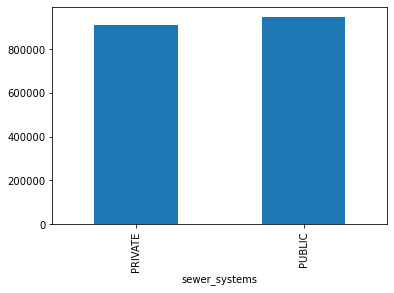

In [68]:
kcdf['sewer_systems'] = kcdf.sewer_system.replace({'PRIVATE RESTRICTED': 'PRIVATE', 'PUBLIC RESTRICTED': 'PUBLIC'})
kcdf.groupby('sewer_systems').mean()['price'].sort_values(ascending=True).plot(kind='bar');

There isnt much difference in price between the two. Also we will keep the new column and drop the old one, but will not include it later.

In [69]:
kcdf.drop('sewer_system', axis=1, inplace=True)

  **Season sold analysis** 

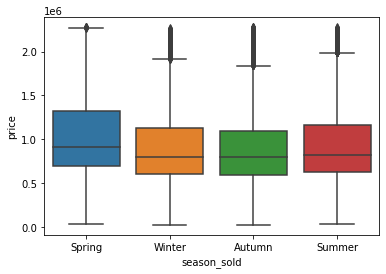

In [70]:
sns.boxplot(x="season_sold", y="price", data=kcdf);

In [71]:
kcdf.season_sold.value_counts()

Summer    8159
Autumn    7241
Spring    6680
Winter    4097
Name: season_sold, dtype: int64

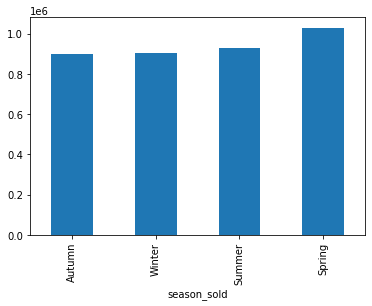

In [72]:
kcdf.groupby('season_sold').mean()['price'].sort_values(ascending=True).plot(kind='bar');

It doesn't seem that the season when the house is sold has much importance, but compared to the others during spring the average price has been higher...

**Zipcode analysis**  

We are going just to see which zipcodes have the higher average price, which will indicate in which zones the price if sold the house will be higher.

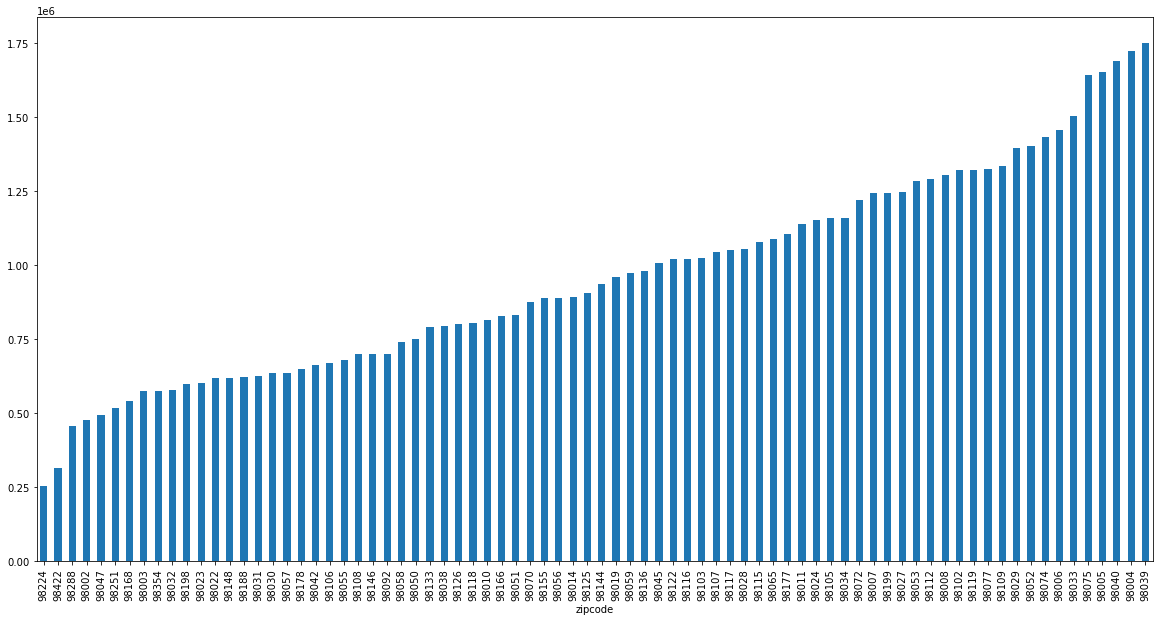

In [73]:
plt.figure(figsize=(20,10))
kcdf.groupby('zipcode').price.mean().sort_values(ascending=True).plot(kind='bar');

It looks like the zipcode which has the higher avg price is 98039

## Finding most important features

Finding some of the most important features so we see which one of these reading the model with influence the price.

In [74]:
most_impt_ft = kcdf.corr()
most_impt_ft

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,age
id,1.000000,0.004392,0.006615,0.011665,0.004899,-0.115757,0.046940,0.013828,-0.012390,0.010320,-0.032246,-0.021476
price,0.004392,1.000000,0.299930,0.417407,0.550353,0.057546,0.208049,0.459015,0.188185,0.221869,0.232217,-0.103659
bedrooms,0.006615,0.299930,1.000000,0.549667,0.642412,-0.016019,0.150773,0.510778,0.204727,0.275857,0.133237,-0.158163
bathrooms,0.011665,0.417407,0.549667,1.000000,0.714310,0.001497,0.410558,0.581248,0.188568,0.417936,0.248238,-0.491410
sqft_living,0.004899,0.550353,0.642412,0.714310,1.000000,0.077296,0.329774,0.838562,0.250887,0.458666,0.311073,-0.342744
sqft_lot,-0.115757,0.057546,-0.016019,0.001497,0.077296,1.000000,-0.039269,0.090702,-0.015781,0.053801,0.148111,-0.002778
floors,0.046940,0.208049,0.150773,0.410558,0.329774,-0.039269,1.000000,0.507334,-0.298427,0.146439,0.095304,-0.538818
sqft_above,0.013828,0.459015,0.510778,0.581248,0.838562,0.090702,0.507334,1.000000,-0.223550,0.514100,0.223273,-0.444076
sqft_basement,-0.012390,0.188185,0.204727,0.188568,0.250887,-0.015781,-0.298427,-0.223550,1.000000,-0.043232,0.148522,0.259216
sqft_garage,0.010320,0.221869,0.275857,0.417936,0.458666,0.053801,0.146439,0.514100,-0.043232,1.000000,0.160277,-0.441571


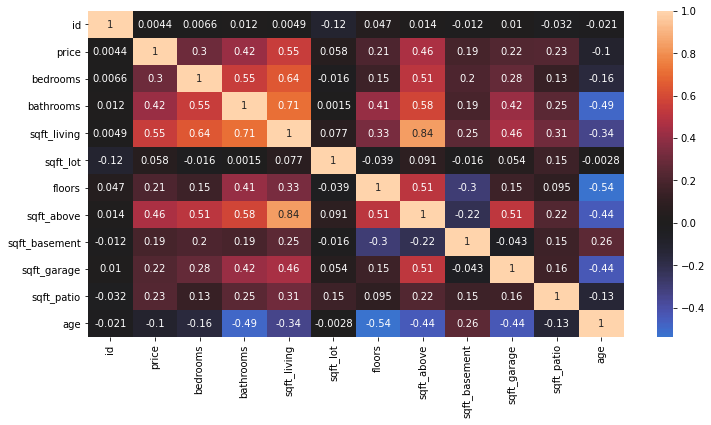

In [75]:
# Its more easy to read on a heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(most_impt_ft, center=0, annot=True);
plt.show;

In [76]:
# sort the corr into a list
most_impt_ft_dict = {}
for i in most_impt_ft.columns:
    most_impt_ft_dict[i] = most_impt_ft[i]['price']
sort_orders = sorted(most_impt_ft_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('price', 1.0),
 ('sqft_living', 0.5503533783986636),
 ('sqft_above', 0.4590153314633649),
 ('bathrooms', 0.417407414591349),
 ('bedrooms', 0.2999303997332406),
 ('sqft_patio', 0.23221680432883296),
 ('sqft_garage', 0.22186872338934902),
 ('floors', 0.20804905914955665),
 ('sqft_basement', 0.18818541161898472),
 ('sqft_lot', 0.05754576805258996),
 ('id', 0.0043915910502890666),
 ('age', -0.1036587113904717)]

Most important features are even though not with a high percentage:  
1.sqft_living (Square footage of living space in the home)  
2.sqft_above (Square footage of house apart from basement)  
3.bathrooms (Number of bathromms)  
4.bedrooms (Number of bedrooms)  
5.sqft_sqft_patio(Square footage of the patio)


### Checking zero infleated features

Checking which features are full of zeros. 

In [77]:
kcdf.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'condition', 'grade',
       'heat_source', 'sqft_above', 'sqft_basement', 'sqft_garage',
       'sqft_patio', 'season_sold', 'zipcode', 'age', 'view_exist',
       'sewer_systems'],
      dtype='object')

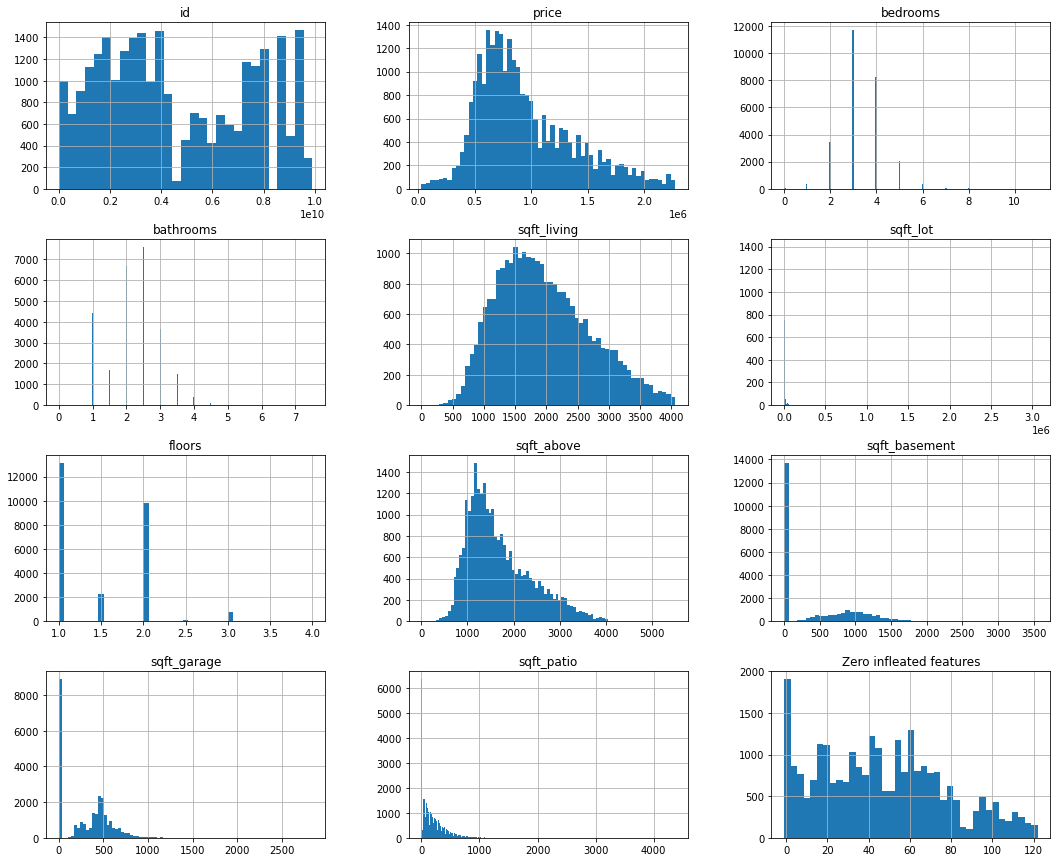

In [78]:
kcdf.hist(figsize=(18,15), bins='auto')
plt.title('Zero infleated features')
plt.show();

By the different histogram  we can notice that, that the features that are full of zeros are: sqft_basement, sqft_garage and sqft_patio.

In [79]:
kcdf.sqft_basement.value_counts()

0       13689
1010      244
1100      206
1060      201
1200      177
        ...  
1708        1
1174        1
1508        1
2210        1
1279        1
Name: sqft_basement, Length: 338, dtype: int64

In [80]:
kcdf.sqft_garage.value_counts()

0       8887
440     1295
480     1196
420      848
400      837
        ... 
1500       1
674        1
1540       1
923        1
582        1
Name: sqft_garage, Length: 338, dtype: int64

In [81]:
kcdf.sqft_patio.value_counts()

0      6321
100     839
80      821
60      795
40      772
       ... 
401       1
18        1
318       1
229       1
277       1
Name: sqft_patio, Length: 457, dtype: int64

Judging by the different histograms, amount of zeros in some of them and small amount of element, I decided that it would be better to treat some of them as categorical groups. 
These are:
-  bedrooms
-  bathrroms
-  floors
-  sqft_basement
-  sqft_garage
-  sqft_patio


So I am going to convert them to 1 and 0, where 1 represent 'has it' and 0 it 'doesnt have it' for all square foot columns, starting with sqft_basement.

In [82]:
#Basement convertion
kcdf.loc[kcdf['sqft_basement']>0, ['sqft_basement']] = 1
kcdf['sqft_basement'] = kcdf.sqft_basement.replace({0: 'NO', 1: 'Yes'})
kcdf.sqft_basement.value_counts()

NO     13689
Yes    12488
Name: sqft_basement, dtype: int64

Same thing even for the sqft_garage and sqft_patio

In [83]:
#Garage convertion
kcdf.loc[kcdf['sqft_garage']>0, ['sqft_garage']] = 1
kcdf['sqft_garage'] = kcdf.sqft_garage.replace({0: 'NO', 1: 'Yes'})
kcdf.sqft_garage.value_counts()

Yes    17290
NO      8887
Name: sqft_garage, dtype: int64

In [84]:
#Patio convertion
kcdf.loc[kcdf['sqft_patio']>0, ['sqft_patio']] = 1
kcdf['sqft_patio'] = kcdf.sqft_patio.replace({0: 'NO', 1: 'Yes'})
kcdf.sqft_patio.value_counts()

Yes    19856
NO      6321
Name: sqft_patio, dtype: int64

Also changing the name to be more appealing.

In [85]:
#changing name for Basement, garage and patio
kcdf.rename(columns={'sqft_basement': 'basement_exist', 'sqft_garage': 'garage_exist', 'sqft_patio': 'patio_exist' }, inplace=True)

In [86]:
#will remove nuisance, sewers because aren't feature who impact the price.(analysis at beginning)
kcdf = kcdf.drop(columns=['sewer_systems','nuisance'], axis=1)

Having decided which numerical columns will be used as categories, is time to convert them into string, but first we will divide them into two list, which will help us with our dataframes: 
-  Numerical data 
-  Categorical data

In [87]:
#Numerical data
numerical_data = [ 'id','price', 'sqft_living', 'sqft_above', 'sqft_lot', 'age']

#Categorical_data, 
categorical_data = ['id','bedrooms', 'bathrooms', 'floors', 'waterfront', 'greenbelt', 'condition',
                    'grade','heat_source', 'basement_exist', 'garage_exist', 'patio_exist', 'season_sold', 
                    'zipcode', 'view_exist']

After the convertion, their Dtype should look something like this, check table below.

In [88]:
#Let's convert the data that are numerical to string
for cat in categorical_data:
        kcdf = kcdf.astype({cat: 'str'})
kcdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26177 entries, 0 to 30154
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26177 non-null  object 
 1   price           26177 non-null  float64
 2   bedrooms        26177 non-null  object 
 3   bathrooms       26177 non-null  object 
 4   sqft_living     26177 non-null  int64  
 5   sqft_lot        26177 non-null  int64  
 6   floors          26177 non-null  object 
 7   waterfront      26177 non-null  object 
 8   greenbelt       26177 non-null  object 
 9   condition       26177 non-null  object 
 10  grade           26177 non-null  object 
 11  heat_source     26177 non-null  object 
 12  sqft_above      26177 non-null  int64  
 13  basement_exist  26177 non-null  object 
 14  garage_exist    26177 non-null  object 
 15  patio_exist     26177 non-null  object 
 16  season_sold     26177 non-null  object 
 17  zipcode         26177 non-null 

After all these preparation is time to start some analysis.

## Modeling
### Second Model

#### Collinearity of predictors and linear relationships with price. 

First let's create a dataframe that includes only the numerical data values.

In [89]:
num_df = kcdf[numerical_data]
num_df

,id,price,sqft_living,sqft_above,sqft_lot,age
0,7399300360,675000.0,1180,1180,7140,53
1,8910500230,920000.0,2770,1570,6703,71
2,1180000275,311000.0,2880,1580,6156,65
3,1604601802,775000.0,2160,1090,1400,11
4,8562780790,592500.0,1120,1120,758,9
...,...,...,...,...,...,...
30150,7834800180,1555000.0,1910,1600,4000,100
30151,194000695,1313000.0,2020,2020,5800,10
30152,7960100080,800000.0,1620,940,3600,27
30153,2781280080,775000.0,2570,1830,2889,16


In [90]:
num_df.columns

Index(['id', 'price', 'sqft_living', 'sqft_above', 'sqft_lot', 'age'], dtype='object')

Now let's create a corrolation matrix, so we can see the corrolation between the variables.

In [91]:
corr = num_df.corr()
corr

,price,sqft_living,sqft_above,sqft_lot,age
price,1.000000,0.550353,0.459015,0.057546,-0.103659
sqft_living,0.550353,1.000000,0.838562,0.077296,-0.342744
sqft_above,0.459015,0.838562,1.000000,0.090702,-0.444076
sqft_lot,0.057546,0.077296,0.090702,1.000000,-0.002778
age,-0.103659,-0.342744,-0.444076,-0.002778,1.000000


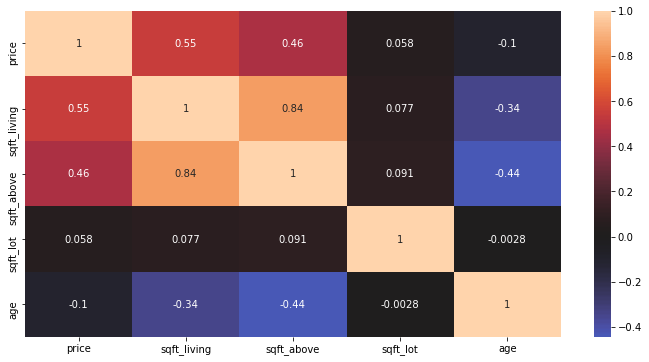

In [92]:
# Its more easy to read on a heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(corr, center=0, annot=True);
plt.show;

To make it even easier to read I will convert the heat map values into a dictionary that will include the elements corrolated with the price and how much, descending. Before doing that, I noticed that there is high collinearity between sqft_living and sqft_above which will make it difficult or impossible to estimate their individual regression coefficients reliably. So we are going to remove sqft_above because sqft_living is a better predictor for the price.

In [93]:
#Drop sqft_above
num_df = num_df.drop('sqft_above', axis = 1)

In [94]:
corr = num_df.corr()
corr

,price,sqft_living,sqft_lot,age
price,1.000000,0.550353,0.057546,-0.103659
sqft_living,0.550353,1.000000,0.077296,-0.342744
sqft_lot,0.057546,0.077296,1.000000,-0.002778
age,-0.103659,-0.342744,-0.002778,1.000000


In [95]:
# sort the corr into a list
corr_dict = {}
for i in corr.columns:
    corr_dict[i] = corr[i]['price']
sort_orders = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('price', 1.0),
 ('sqft_living', 0.5503533783986636),
 ('sqft_lot', 0.05754576805258996),
 ('age', -0.1036587113904717)]

After checking the corrolation we are going to check linear relationships between the predictors and the target.

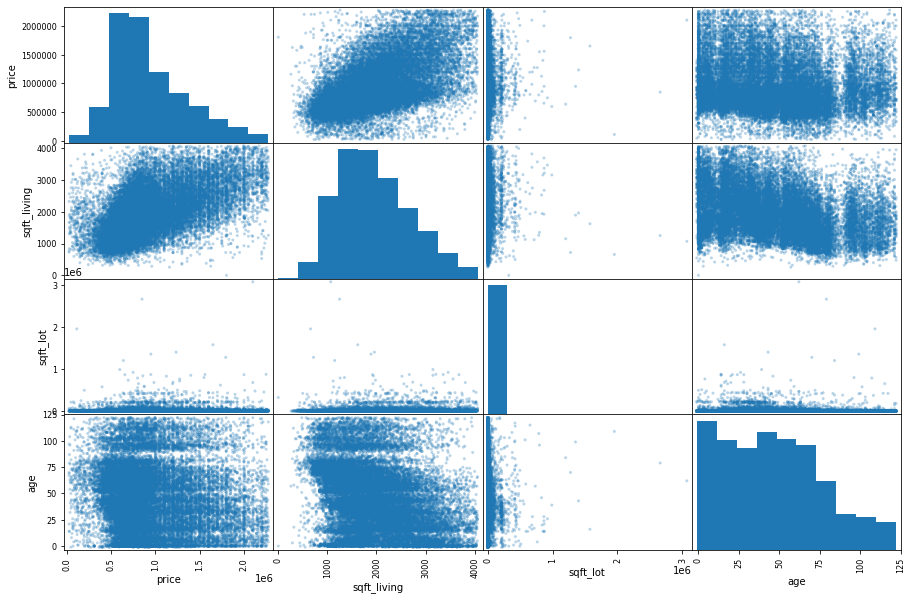

In [96]:
pd.plotting.scatter_matrix(num_df, figsize=(15,10), alpha=.3);

After observing the different heatmaps and scatter matrix I can say that sqft_living is the top related feature with the price even though a 62% corr is not that high. 

In [97]:
data = num_df

In [98]:
data.shape

(26177, 5)

In [99]:
#We are going to keep only sqft_living as a predictor.
y = data['price']
X = data[['sqft_living', 'sqft_lot', 'age']]

In [100]:
# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()
# Display results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     3942.
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:34   Log-Likelihood:            -3.7183e+05
No. Observations:               26177   AIC:                         7.437e+05
Df Residuals:                   26173   BIC:                         7.437e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.126e+05   8442.940     25.180      

**Interpretation model 2:** Overall the model and coefficients are statistically significant, with all p-values well below a standard alpha of 0.05. The R-squared value on the other hand, dropped to 0.311, which means onlly 31,1% of the variance in the price can be explained by square foot living, which is quite low. Acording to the model, for every sqft the price of the house will increase by 340$. Anyway because of the low percent we need to improve the model.

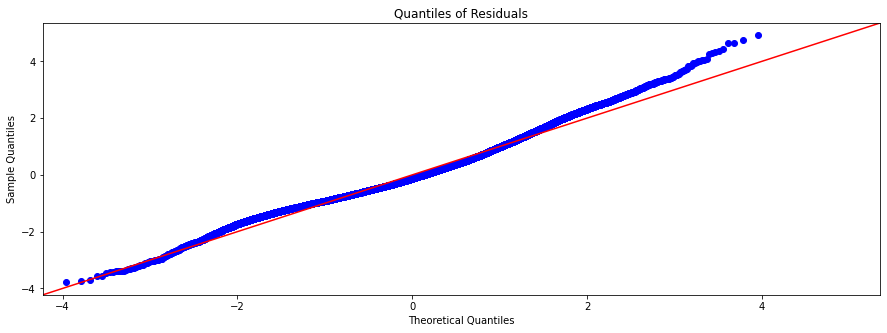

In [101]:
# Displaying a qq plot
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals")
plt.show()

Judging by the plot we can say that this is in a relative normal distribution.

We will contrinue by adding dummies into out data now. To do this I need to creata a dataframe that involves all numerical and categorical data columns.

In [102]:
#Because of the high collinearity between sqft_living and sqft_above i will not include sqft_above into the new dataframe
final_df = data[['id','price', 'sqft_living', 'sqft_lot', 'age' ]]

In [103]:
#next the categorical dataframe
category_df = kcdf[categorical_data]

In [104]:
#Lets merge all 
new_all_element = pd.merge(final_df, category_df,how='left', on="id")
new_all_element

,id,price,sqft_living,sqft_lot,age,bedrooms,bathrooms,floors,waterfront,greenbelt,condition,grade,heat_source,basement_exist,garage_exist,patio_exist,season_sold,zipcode,view_exist
0,7399300360,675000.0,1180,7140,53,4,1.0,1.0,NO,NO,Good,7 Average,Gas,NO,NO,Yes,Spring,98055,NO
1,8910500230,920000.0,2770,6703,71,5,2.5,1.0,NO,NO,Average,7 Average,Oil,Yes,NO,Yes,Winter,98133,Yes
2,1180000275,311000.0,2880,6156,65,6,2.0,1.0,NO,NO,Average,7 Average,Gas,Yes,NO,NO,Autumn,98178,Yes
3,1604601802,775000.0,2160,1400,11,3,3.0,2.0,NO,NO,Average,9 Better,Gas,Yes,Yes,Yes,Winter,98118,Yes
4,8562780790,592500.0,1120,758,9,2,2.0,2.0,NO,NO,Average,7 Average,Electricity,Yes,Yes,Yes,Summer,98027,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26172,7834800180,1555000.0,1910,4000,100,5,2.0,1.5,NO,NO,Good,8 Good,Oil,Yes,NO,Yes,Autumn,98103,NO
26173,194000695,1313000.0,2020,5800,10,3,2.0,2.0,NO,NO,Average,7 Average,Gas,NO,NO,Yes,Summer,98116,Yes
26174,7960100080,800000.0,1620,3600,27,3,2.0,1.0,NO,NO,Average,7 Average,Gas,Yes,Yes,Yes,Spring,98122,NO
26175,2781280080,775000.0,2570,2889,16,3,2.5,2.0,NO,NO,Average,8 Good,Gas,Yes,Yes,Yes,Winter,98055,NO


Now that we have all data in one dataframe we can remove 'id' so it wont interfere in any of the models.

We are going to remove if from our list of categorical_data because we are going to create dummies using that list of categorical columns name, but first we need to remove id otherwise it will create dummy id-s.

In [105]:
#droping if from teh list
categorical_data.remove('id')

In [106]:
#This code will create a df with all numerical and dummy categorical columns
new_all_element_dummies = pd.get_dummies(data=new_all_element, columns=categorical_data, drop_first=True)
new_all_element_dummies

,id,price,sqft_living,sqft_lot,age,bedrooms_1,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,...,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,zipcode_98224,zipcode_98251,zipcode_98288,zipcode_98354,zipcode_98422,view_exist_Yes
0,7399300360,675000.0,1180,7140,53,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,920000.0,2770,6703,71,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1180000275,311000.0,2880,6156,65,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1604601802,775000.0,2160,1400,11,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,8562780790,592500.0,1120,758,9,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26172,7834800180,1555000.0,1910,4000,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26173,194000695,1313000.0,2020,5800,10,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
26174,7960100080,800000.0,1620,3600,27,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26175,2781280080,775000.0,2570,2889,16,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Because we don't want to involve the target with the predictor into our model, we going to create a list of all predictors without the target.

In [107]:
#list of all columns in our df
list_dummy = list(new_all_element_dummies.columns)

In [108]:
#List of target and id that we dont want to be involved into our model
list_pred = ['id','price' ]
list_pred

['id', 'price']

In [109]:
#list will only the predictors
list_w_pred = [i for i in list_dummy if i not in list_pred]
list_w_pred

['sqft_living',
 'sqft_lot',
 'age',
 'bedrooms_1',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0.5',
 'bathrooms_1.0',
 'bathrooms_1.5',
 'bathrooms_2.0',
 'bathrooms_2.5',
 'bathrooms_3.0',
 'bathrooms_3.5',
 'bathrooms_4.0',
 'bathrooms_4.5',
 'bathrooms_5.0',
 'bathrooms_5.5',
 'bathrooms_6.0',
 'bathrooms_6.5',
 'bathrooms_7.0',
 'bathrooms_7.5',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'floors_4.0',
 'waterfront_YES',
 'greenbelt_YES',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very Good',
 'grade_11 Excellent',
 'grade_12 Luxury',
 'grade_2 Substandard',
 'grade_3 Poor',
 'grade_4 Low',
 'grade_5 Fair',
 'grade_6 Low Average',
 'grade_7 Average',
 'grade_8 Good',
 'grade_9 Better',
 'heat_source_Electricity/Solar',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'heat_source_Oil',
 'heat_source_Oil/Sol

In [110]:
#Model with all the predictors and dummies
y_all = new_all_element_dummies['price']
X_all = new_all_element_dummies[list_w_pred]

# Create an OLS model
model_all = sm.OLS(endog=y_all, exog=sm.add_constant(X_all))
# Get model results
results_all = model_all.fit()
# Display results summary
print(results_all.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     490.2
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:35   Log-Likelihood:            -3.5974e+05
No. Observations:               26177   AIC:                         7.198e+05
Df Residuals:                   26035   BIC:                         7.209e+05
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

**Interpretation model 3:** Overall the model and coefficients are statistically significant, with most of p-values well below a 
    standard alpha of 0.05. The elements that have a p-value higher that 0.05 arent that significat, like age, 11 bedrooms, floor 1.5 or 2.5 or 3.5.
    The R-squared value on the other hand, is 0.726, which means only 72.6,1% of the variance 
    in the price can be explained by square foot living, which is quite high compared to the previous models. Acording to the model, for every sqft the price of the house will increase by \\$210 dollars. 
    Having a waterfront increases the price by \\$40k, ect...

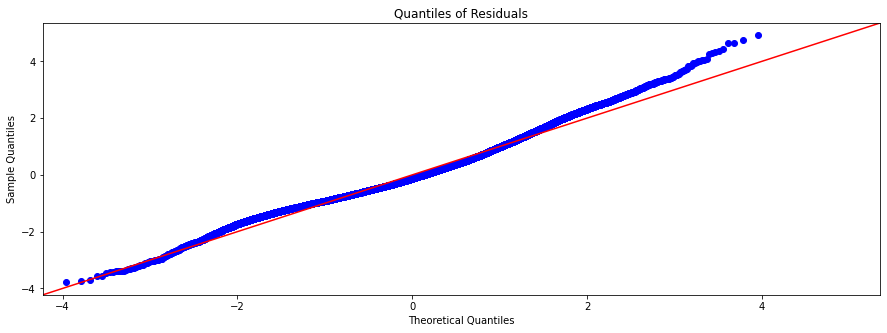

In [111]:
# Displaying a qq plot
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals")
plt.show();

In [112]:
y_scaled = (y_all - y_all.mean())/ y_all.std()
x_scaled = (X_all - X_all.mean())/ X_all.std()

fd_model_scaled = sm.OLS(y_scaled, sm.add_constant(x_scaled))
results_scaled = fd_model_scaled.fit()
results_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     490.2
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:36   Log-Likelihood:                -20179.
No. Observations:               26177   AIC:                         4.064e+04
Df Residuals:                   26035   BIC:                         4.180e+04
Df Model:                         141                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -8.174e-18      0.003  -2.52e-15      1.000      -0.006       0.006
sqft_living                       0.3620      0.006     55.897      0.000       0.349       0.375
sqft_lot                          0.0584      0.003     16.746      0.000       0.052       0.065
age                               0.0039      0.006      0.677      0.498      -0.007       0.015
bedrooms_1                       -0.0656      0.015     -4.519      0.000      -0.094      -0.037
bedrooms_10                      -0.0106      0.004     -2.768      0.006      -0.018      -0.003
bedrooms_11                      -0.0055      0.003     -1.637      0.102      -0.012       0.001
bedrooms_2                       -0.2355      0.042     -5.623      0.000      -0.318      -0.153
bedrooms_3                       -0.3168      0.061     -5.153      0.000      -0.437      -0.196
bedrooms_4                       -0.2834      0.058     -4.923      0.000      -0.396      -0.171
bedrooms_5                       -0.1806      0.033     -5.434      0.000      -0.246      -0.115
bedrooms_6                       -0.0793      0.014     -5.615      0.000      -0.107      -0.052
bedrooms_7                       -0.0345      0.007     -5.251      0.000      -0.047      -0.022
bedrooms_8                       -0.0255      0.005     -5.027      0.000      -0.035      -0.016
bedrooms_9                       -0.0120      0.004     -2.941      0.003      -0.020      -0.004
bathrooms_0.5                     0.0130      0.004      3.352      0.001       0.005       0.021
bathrooms_1.0                     0.2374      0.056      4.203      0.000       0.127       0.348
bathrooms_1.5                     0.1416      0.037      3.795      0.000       0.068       0.215
bathrooms_2.0                     0.2660      0.066      4.042      0.000       0.137       0.395
bathrooms_2.5                     0.2959      0.068      4.320      0.000       0.162       0.430
bathrooms_3.0                     0.2363      0.052      4.506      0.000       0.134       0.339
bathrooms_3.5                     0.1722      0.035      4.865      0.000       0.103       0.242
bathrooms_4.0                     0.0951      0.018      5.161      0.000       0.059       0.131
bathrooms_4.5                     0.0520      0.010      4.964      0.000       0.031       0.072
bathrooms_5.0                     0.0248      0.006      4.279      0.000       0.013       0.036
bathrooms_5.5                     0.0120      0.004      2.776      0.006       0.004       0.020
bathrooms_6.0                     0.0194      0.004      4.670      0.000       0.011       0.027
bathrooms_6.5                     0.0127      0.004      3.611      0.000       0.006       0.020
bathrooms_7.0                     0.0134     

## Log-Transform and Standardize

Having a high percentage doesnt mean we can stop, so we will try to do some more improvements so that the price can go higher.
We are going to log-transform our model. Why? Simple, because the Logarithmic transformation(log-tranform) is a convenient means of transforming a highly skewed variable into a more normalized dataset, and then standardize them so the coefficent are more comparable.

In [113]:
# Standardaizes data to mean and standard deviation.
def standardize(data):
    num = (data - np.mean(data))
    denom = np.std(data)
    return num/denom

In [114]:
new_all_element_dummies['log_price'] = np.log(new_all_element_dummies['price'])
new_all_element_dummies['log_sqft_liv'] = np.log(new_all_element_dummies['sqft_living'])

new_all_element_dummies['std_log_price'] = standardize(new_all_element_dummies['log_price'])
new_all_element_dummies['std_log_sqft'] = standardize(new_all_element_dummies['log_sqft_liv'])

In [115]:
list(new_all_element_dummies.columns)

['id',
 'price',
 'sqft_living',
 'sqft_lot',
 'age',
 'bedrooms_1',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0.5',
 'bathrooms_1.0',
 'bathrooms_1.5',
 'bathrooms_2.0',
 'bathrooms_2.5',
 'bathrooms_3.0',
 'bathrooms_3.5',
 'bathrooms_4.0',
 'bathrooms_4.5',
 'bathrooms_5.0',
 'bathrooms_5.5',
 'bathrooms_6.0',
 'bathrooms_6.5',
 'bathrooms_7.0',
 'bathrooms_7.5',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'floors_4.0',
 'waterfront_YES',
 'greenbelt_YES',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very Good',
 'grade_11 Excellent',
 'grade_12 Luxury',
 'grade_2 Substandard',
 'grade_3 Poor',
 'grade_4 Low',
 'grade_5 Fair',
 'grade_6 Low Average',
 'grade_7 Average',
 'grade_8 Good',
 'grade_9 Better',
 'heat_source_Electricity/Solar',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'heat_source_Oil',
 'he

In [116]:
list_pred = ['id', 'price', 'sqft_living', 'age', 'bedrooms_11','floors_1.5', 'floors_3.5', 'floors_2.5', 'grade_12 Luxury', 'grade_2 Substandard', 'heat_source_Electricity/Solar',
            'heat_source_Oil', 'heat_source_Other',
            ]
list_pred

['id',
 'price',
 'sqft_living',
 'age',
 'bedrooms_11',
 'floors_1.5',
 'floors_3.5',
 'floors_2.5',
 'grade_12 Luxury',
 'grade_2 Substandard',
 'heat_source_Electricity/Solar',
 'heat_source_Oil',
 'heat_source_Other']

In [117]:
list_w_pred2 = [i for i in list_dummy if i not in list_pred]
list_w_pred2 = ['std_log_sqft'] + list_w_pred2
list_w_pred2

['std_log_sqft',
 'sqft_lot',
 'bedrooms_1',
 'bedrooms_10',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0.5',
 'bathrooms_1.0',
 'bathrooms_1.5',
 'bathrooms_2.0',
 'bathrooms_2.5',
 'bathrooms_3.0',
 'bathrooms_3.5',
 'bathrooms_4.0',
 'bathrooms_4.5',
 'bathrooms_5.0',
 'bathrooms_5.5',
 'bathrooms_6.0',
 'bathrooms_6.5',
 'bathrooms_7.0',
 'bathrooms_7.5',
 'floors_2.0',
 'floors_3.0',
 'floors_4.0',
 'waterfront_YES',
 'greenbelt_YES',
 'condition_Fair',
 'condition_Good',
 'condition_Poor',
 'condition_Very Good',
 'grade_11 Excellent',
 'grade_3 Poor',
 'grade_4 Low',
 'grade_5 Fair',
 'grade_6 Low Average',
 'grade_7 Average',
 'grade_8 Good',
 'grade_9 Better',
 'heat_source_Gas',
 'heat_source_Gas/Solar',
 'heat_source_Oil/Solar',
 'basement_exist_Yes',
 'garage_exist_Yes',
 'patio_exist_Yes',
 'season_sold_Spring',
 'season_sold_Summer',
 'season_sold_Winter',
 'zipcode_98003',
 'zipcode_

Time to create the log-transform and stand model

In [118]:
#We are going to keep only sqft_living as a predictor.
y_all_v2 = new_all_element_dummies['std_log_price']
X_all_v2 = new_all_element_dummies[list_w_pred2]

# Create an OLS model
model_all_v2 = sm.OLS(endog=y_all_v2, exog=sm.add_constant(X_all_v2))
# Get model results
results_all_v2 = model_all_v2.fit()
# Display results summary
print(results_all_v2.summary())

                            OLS Regression Results                            
Dep. Variable:          std_log_price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     341.6
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:37   Log-Likelihood:                -24055.
No. Observations:               26177   AIC:                         4.837e+04
Df Residuals:                   26045   BIC:                         4.945e+04
Df Model:                         131                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.76

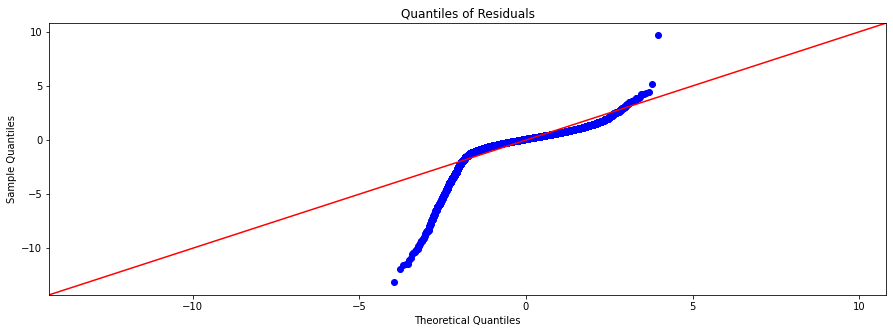

In [119]:
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results_all_v2.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals")
plt.show()

## log-transform and scaling

In [120]:
bef = ['log_sqft_liv','sqft_lot','bedrooms_1','bedrooms_10','bedrooms_11','bedrooms_2','bedrooms_3','bedrooms_4','bedrooms_5','bedrooms_6',
       'bedrooms_7','bedrooms_8','bedrooms_9','bathrooms_0.5','bathrooms_1.0','bathrooms_1.5','bathrooms_2.0','bathrooms_2.5',
       'bathrooms_3.0','bathrooms_3.5','bathrooms_4.0','bathrooms_4.5','bathrooms_5.0','bathrooms_5.5','bathrooms_6.0',
       'bathrooms_6.5','bathrooms_7.0','bathrooms_7.5','floors_1.5','floors_2.0','floors_2.5','floors_3.0','floors_3.5',
       'floors_4.0','waterfront_YES','greenbelt_YES','condition_Fair','condition_Good','condition_Poor','condition_Very Good',
       'grade_11 Excellent','grade_12 Luxury','grade_2 Substandard','grade_3 Poor','grade_4 Low','grade_5 Fair',
       'grade_6 Low Average','grade_7 Average','grade_8 Good','grade_9 Better','heat_source_Electricity/Solar',
       'heat_source_Gas','heat_source_Gas/Solar','heat_source_Oil','heat_source_Oil/Solar','heat_source_Other',
       'basement_exist_Yes','garage_exist_Yes','patio_exist_Yes','season_sold_Spring','season_sold_Summer','season_sold_Winter',
       'zipcode_98003','zipcode_98004','zipcode_98005','zipcode_98006','zipcode_98007','zipcode_98008','zipcode_98010',
       'zipcode_98011','zipcode_98014','zipcode_98019','zipcode_98022','zipcode_98023','zipcode_98024','zipcode_98027',
       'zipcode_98028','zipcode_98029','zipcode_98030','zipcode_98031','zipcode_98032','zipcode_98033','zipcode_98034',
       'zipcode_98038','zipcode_98039','zipcode_98040','zipcode_98042','zipcode_98045','zipcode_98047','zipcode_98050',
       'zipcode_98051','zipcode_98052','zipcode_98053','zipcode_98055','zipcode_98056','zipcode_98057','zipcode_98058',
       'zipcode_98059','zipcode_98065','zipcode_98070','zipcode_98072','zipcode_98074','zipcode_98075','zipcode_98077',
       'zipcode_98092','zipcode_98102','zipcode_98103','zipcode_98105','zipcode_98106','zipcode_98107','zipcode_98108',
       'zipcode_98109','zipcode_98112','zipcode_98115','zipcode_98116','zipcode_98117','zipcode_98118','zipcode_98119',
       'zipcode_98122','zipcode_98125','zipcode_98126','zipcode_98133','zipcode_98136','zipcode_98144','zipcode_98146',
       'zipcode_98148','zipcode_98155','zipcode_98166','zipcode_98168','zipcode_98177','zipcode_98178','zipcode_98188',
       'zipcode_98198','zipcode_98199','zipcode_98224','zipcode_98251','zipcode_98288','zipcode_98354','zipcode_98422',
       'view_exist_Yes']

In [121]:
y_bef = new_all_element_dummies['log_price']
X_bef = new_all_element_dummies[bef]

# Create an OLS model
model_bef = sm.OLS(endog=y_bef, exog=sm.add_constant(X_bef))
# Get model results
results_bef = model_bef.fit()
# Display results summary
print(results_bef.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     320.1
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:37   Log-Likelihood:                -5083.8
No. Observations:               26177   AIC:                         1.045e+04
Df Residuals:                   26036   BIC:                         1.160e+04
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [122]:
#scaling final model
y_scaled_2 = (y_bef - y_bef.mean())/ y_bef.std()
x_scaled_2 = (X_bef - X_bef.mean())/ X_bef.std()

fd_model_scaled_2 = sm.OLS(y_scaled_2, sm.add_constant(x_scaled_2))
results_scaled_2 = fd_model_scaled_2.fit()
results_scaled_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     320.1
Date:                Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:34:38   Log-Likelihood:                -24040.
No. Observations:               26177   AIC:                         4.836e+04
Df Residuals:                   26036   BIC:                         4.951e+04
Df Model:                         140                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -7.98e-13      0.004  -2.12e-10      1.000      -0.007       0.007
log_sqft_liv                      0.3018      0.008     39.309      0.000       0.287       0.317
sqft_lot                          0.0582      0.004     14.412      0.000       0.050       0.066
bedrooms_1                       -0.1057      0.017     -6.283      0.000      -0.139      -0.073
bedrooms_10                      -0.0122      0.004     -2.734      0.006      -0.021      -0.003
bedrooms_11                      -0.0076      0.004     -1.966      0.049      -0.015   -2.41e-05
bedrooms_2                       -0.3803      0.049     -7.823      0.000      -0.476      -0.285
bedrooms_3                       -0.5444      0.071     -7.616      0.000      -0.684      -0.404
bedrooms_4                       -0.4881      0.067     -7.288      0.000      -0.619      -0.357
bedrooms_5                       -0.2894      0.039     -7.483      0.000      -0.365      -0.214
bedrooms_6                       -0.1192      0.016     -7.252      0.000      -0.151      -0.087
bedrooms_7                       -0.0544      0.008     -7.111      0.000      -0.069      -0.039
bedrooms_8                       -0.0339      0.006     -5.754      0.000      -0.045      -0.022
bedrooms_9                       -0.0179      0.005     -3.766      0.000      -0.027      -0.009
bathrooms_0.5                     0.0213      0.004      4.741      0.000       0.012       0.030
bathrooms_1.0                     0.3926      0.066      5.981      0.000       0.264       0.521
bathrooms_1.5                     0.2418      0.043      5.583      0.000       0.157       0.327
bathrooms_2.0                     0.4592      0.076      6.012      0.000       0.309       0.609
bathrooms_2.5                     0.5029      0.079      6.329      0.000       0.347       0.659
bathrooms_3.0                     0.3975      0.061      6.536      0.000       0.278       0.517
bathrooms_3.5                     0.2783      0.041      6.783      0.000       0.198       0.359
bathrooms_4.0                     0.1493      0.021      6.988      0.000       0.107       0.191
bathrooms_4.5                     0.0839      0.012      6.920      0.000       0.060       0.108
bathrooms_5.0                     0.0433      0.007      6.462      0.000       0.030       0.056
bathrooms_5.5                     0.0272      0.005      5.439      0.000       0.017       0.037
bathrooms_6.0                     0.0251      0.005      5.216      0.000       0.016       0.034
bathrooms_6.5                     0.0134      0.004      3.288      0.001       0.005       0.021
bathrooms_7.0                     0.0210      0.005      4.315      0.000       0.011       0.031
bathrooms_7.5                     0.0154     

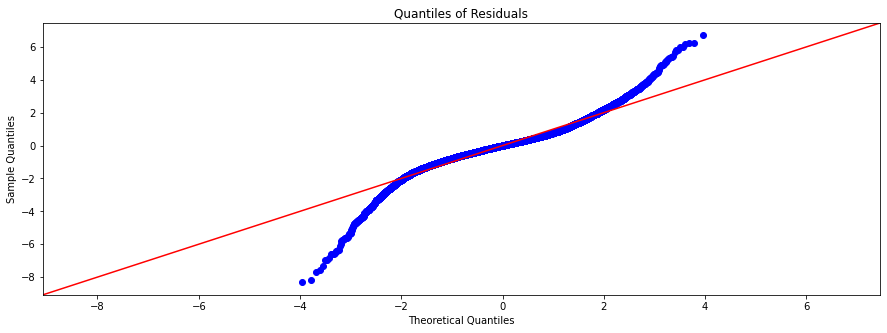

In [123]:
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results_scaled.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals")
plt.show();

## Conclusion

The final model has to be the one with an R-squared score of 0.726 and yields information at 72.6%. This king of percentage will help KVZ in helping home sellers in their attemp to increase their house price before puting it into sale. As we determinated earlier some of the features that will help them are: 
1.sqft_living (Square footage of living space in the home)  
2.sqft_above (Square footage of house apart from basement)  
3.bathrooms (Number of bathromms)  
4.bedrooms (Number of bedrooms)  
5.sqft_sqft_patio(Square footage of the patio)

1.Square footage of living space in the home and Square footage of house apart from basement
Because I had to remove sqft_above because it had high colliniarity with sqft_living, I might just say that increasing sqft_living would have been the same as increasing sqft_above, in other words it would have had a good inpact in the price. 
The more sqft they have or get to expand on their home the higher the price of the house. 

2.Number of bathromms
According to the data every house with at least 1 bathroom is significant, but the price of the house would increase even higher if they have more than 5 bathrooms. 

3.Number of bedrooms
According to the data, which kind of make no sense for this part, the bedrroms are significant but it looks like their price will always decrease the value of the house. 

4.Square footage of the patio
When it came to the patio because most of the houses had a large amount of 0 that made me convert it into a category value where a house has or doesnt have a patio we cant determinate on how much the sqft will increase the value of the house, but having one will increase the value of the house for sure.

5.Notable mentions. Features that arent in top five but by the data were determinated to have a high increase in the house value and should be considered are having: a view, a green belt, a grade_12 luxury, heat_source_oil/Solar.
And living in one of this zipcode areas: 98005, 98006, 98007, 98008, 98033, 98040 ect... but i mention just some who had a high value of increase in the price. 